## Multi-Position "Universal" NN

### Imports

In [ ]:
import pandas as pd
import glob
import os
from IPython.display import display
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import random
from sklearn.metrics import r2_score, mean_squared_error


### Data

In [3]:
### Individual Data Sets for 2023
#Create a dictionary to store each DataFrame separately
dfs23 = {}
folder_path = "/Users/evanellington/Downloads/CS 230/Project Data/2023" 
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

for f in csv_files:
    # Use the filename (without path and extension) as the key
    key = os.path.splitext(os.path.basename(f))[0]
    dfs23[key] = pd.read_csv(f, encoding="ISO-8859-1")

# Accessing the individual data sets
QB_df23 = dfs23.get("2023_Stats(QBs)")  
WR_df23 = dfs23.get("2023_Stats(WRs)")
RB_df23 = dfs23.get("2023_Stats(RBs)")
TE_df23 = dfs23.get("2023_Stats(TEs)")
K_df23 = dfs23.get("2023_Stats(Ks)")
DST_df23 = dfs23.get("2023_Stats(DSTs)")

In [4]:
### Individual Data Sets for 2024
# Create a dictionary to store each DataFrame separately
dfs24 = {}
folder_path = "/Users/evanellington/Downloads/CS 230/Project Data/2024" 
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

for f in csv_files:
    # Use the filename (without path and extension) as the key
    key = os.path.splitext(os.path.basename(f))[0]
    dfs24[key] = pd.read_csv(f, encoding="ISO-8859-1")

# Accessing the individual data sets
QB_df24 = dfs24.get("2024_Stats(QBs)") 
WR_df24 = dfs24.get("2024_Stats(WRs)")
RB_df24 = dfs24.get("2024_Stats(RBs)")
TE_df24 = dfs24.get("2024_Stats(TEs)")
K_df24 = dfs24.get("2024_Stats(Ks)")
DST_df24 = dfs24.get("2024_Stats(DSTs)")


In [ ]:
### Individual Data Sets for 2025
# Creating a dictionary to store each DataFrame separately
dfs = {}
folder_path = "/Users/evanellington/Downloads/CS 230/Project Data/2025" 
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

for f in csv_files:
    # Use the filename (without path and extension) as the key
    key = os.path.splitext(os.path.basename(f))[0]
    dfs[key] = pd.read_csv(f, encoding="ISO-8859-1")

# Accessing the individual data sets
QB_df25 = dfs.get("2025_Stats (QBs)")
WR_df25 = dfs.get("2025_Stats (WRs)")
RB_df25 = dfs.get("2025_Stats (RBs)")
TE_df25 = dfs.get("2025_Stats (TEs)")
K_df25 = dfs.get("2025_Stats (Ks)")
DST_df25 = dfs.get("2025_Stats (DSTs)")

In [5]:
# Setting Random Seed
SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

### Model

Epoch 1/500


/Users/evanellington/.julia/conda/3/aarch64/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 - 0s - 21ms/step - loss: 1.5803 - val_loss: 1.1156
Epoch 2/500
20/20 - 0s - 2ms/step - loss: 1.2650 - val_loss: 1.0380
Epoch 3/500
20/20 - 0s - 2ms/step - loss: 1.0687 - val_loss: 0.9622
Epoch 4/500
20/20 - 0s - 1ms/step - loss: 0.9565 - val_loss: 0.9031
Epoch 5/500
20/20 - 0s - 1ms/step - loss: 0.9815 - val_loss: 0.8516
Epoch 6/500
20/20 - 0s - 1ms/step - loss: 0.8029 - val_loss: 0.7978
Epoch 7/500
20/20 - 0s - 1ms/step - loss: 0.8374 - val_loss: 0.7764
Epoch 8/500
20/20 - 0s - 1ms/step - loss: 0.8361 - val_loss: 0.7584
Epoch 9/500
20/20 - 0s - 1ms/step - loss: 0.7725 - val_loss: 0.7345
Epoch 10/500
20/20 - 0s - 1ms/step - loss: 0.7595 - val_loss: 0.7073
Epoch 11/500
20/20 - 0s - 2ms/step - loss: 0.7777 - val_loss: 0.7060
Epoch 12/500
20/20 - 0s - 1ms/step - loss: 0.7130 - val_loss: 0.6932
Epoch 13/500
20/20 - 0s - 2ms/step - loss: 0.7111 - val_loss: 0.6763
Epoch 14/500
20/20 - 0s - 1ms/step - loss: 0.6845 - val_loss: 0.6667
Epoch 15/500
20/20 - 0s - 2ms/step - loss: 0.7316 - va

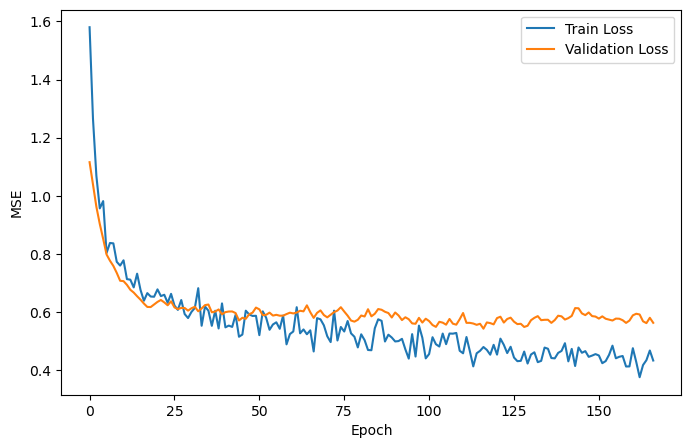

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Validation R²: 0.6193, RMSE: 65.1615
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step
                  Name position  predicted_2025_fp FantasyPoints    ADP
200      Ja'Marr Chase       WR         250.053574         403.0    6.5
0        Lamar Jackson       QB         238.781158         511.6   38.0
1           Joe Burrow       QB         235.543793         458.5   68.0
3           Josh Allen       QB         233.832596         434.4   22.0
100       Jahmyr Gibbs       RB         226.288055         362.9   11.5
8          Jalen Hurts       QB         216.869522         350.6   30.5
102     Bijan Robinson       RB         213.710419         341.7    5.5
107         James Cook       RB         212.553116         266.7   33.5
101     Saquon Barkley       RB         208.701065         355.3   10.5
5           Jared Goff       QB         208.640869           399  109.0
105        Josh Jacobs       RB         201.960678         293.3   20.5
201        Amon-Ra 

In [ ]:

# --- Prepare combined training data --- #
positions = ['QB', 'RB', 'WR', 'TE', 'K', 'DST']
combined_train = []

for pos in positions:
    df_23 = dfs23[f'2023_Stats({pos}s)']
    df_24 = dfs24[f'2024_Stats({pos}s)']
    
    df = df_23.merge(
        df_24[['Name', 'FantasyPoints']], 
        on='Name', 
        how='inner', 
        suffixes=('_2023', '_2024')
    )
    df['Position'] = pos
    combined_train.append(df)

df_train = pd.concat(combined_train, ignore_index=True)


# --- Prepare features and target --- #
drop_cols = ['Name', 'FantasyPoints_2024','Name_pos_team','Team']
feature_cols = df_train.drop(columns=drop_cols + ['Position']).columns
X_numeric = df_train[feature_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
y_target = df_train['FantasyPoints_2024'].apply(pd.to_numeric, errors='coerce').fillna(0)
positions_col = df_train['Position']


# --- Train/Validation Split --- #
X_train_num, X_val_num, y_train, y_val, pos_train, pos_val = train_test_split(
    X_numeric, y_target, positions_col, test_size=0.15, random_state=42
)

# One-hot encode the Position column for categorical representation
pos_encoder = OneHotEncoder(sparse_output=False)
pos_train_encoded = pos_encoder.fit_transform(pos_train.to_frame())
pos_val_encoded = pos_encoder.transform(pos_val.to_frame())
pos_cols = pos_encoder.get_feature_names_out(['Position'])

# Combine numeric + one-hot
X_train_combined = pd.concat([X_train_num.reset_index(drop=True),
                              pd.DataFrame(pos_train_encoded, columns=pos_cols)], axis=1)
X_val_combined = pd.concat([X_val_num.reset_index(drop=True),
                            pd.DataFrame(pos_val_encoded, columns=pos_cols)], axis=1)

# Combine numeric features with one-hot encoded position features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_combined)
X_val_scaled = scaler_X.transform(X_val_combined)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).astype(np.float32)
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1,1)).astype(np.float32)

# --- Model --- #
model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

es = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=500,
    batch_size=16,
    callbacks=[es],
    verbose=2
)

# --- Plotting --#
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

#scaled predctions and R² calculation
y_val_pred_scaled = model.predict(X_val_scaled)
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"\nValidation R²: {r2_val:.4f}, RMSE: {rmse_val:.4f}")

# Now testing
combined_test = []
for pos in positions:
    df_test = dfs24[f'2024_Stats({pos}s)'].copy()
    df_test['Position'] = pos
    combined_test.append(df_test)

df_test_2025 = pd.concat(combined_test, ignore_index=True)

# Numeric features
X_test_num = df_test_2025.reindex(columns=feature_cols, fill_value=0)
X_test_num = X_test_num.apply(pd.to_numeric, errors='coerce').fillna(0)

# One-hot encode positions
pos_test_encoded = pos_encoder.transform(df_test_2025[['Position']])
X_test_combined = pd.concat([X_test_num.reset_index(drop=True),
                             pd.DataFrame(pos_test_encoded, columns=pos_cols)], axis=1)

X_test_scaled = scaler_X.transform(X_test_combined)

# Predicting 2025
y_pred_scaled_2025 = model.predict(X_test_scaled)
y_pred_2025 = scaler_y.inverse_transform(y_pred_scaled_2025)
df_test_2025['Predicted_2025_FP'] = y_pred_2025.flatten()
df_test_2025.rename(columns={'Predicted_2025_FP': 'predicted_2025_fp', 'Position':'position'}, inplace=True)

# final draft board
draft_board = df_test_2025[['Name','position','predicted_2025_fp', 'FantasyPoints','ADP']].sort_values(
    by='predicted_2025_fp', ascending=False
)
print(draft_board.head(20))


### Snake Draft

In [17]:
def get_best_available(player_pool, current_roster=None, sort_column='ADP'):
    """
    Returns the best available player based on the given sort_column.
    """
    available = player_pool[player_pool['Drafted'] == False]

    # Sort ascending for ADP, descending for projections
    if sort_column.upper() == 'ADP':
        available = available.sort_values(by='ADP', ascending=True)
    else:
        available = available.sort_values(by=sort_column, ascending=False)

    return available.iloc[0]

# Max limits for roster
ROSTER_LIMITS = {
    'QB': 2,
    'RB': 6,
    'WR': 6,
    'TE': 2,
    'K': 1,
    'DST': 1
}

# Min requirements for roster
MINIMUM_REQUIRED = {
    'QB': 1,
    'RB': 1,
    'WR': 1,
    'TE': 1,
    'K': 1,
    'DST': 1
}

def plot_model_vs_all_opponents_histogram(model_scores, all_opp_scores, model_name="NN"):
    """
    Plot histogram of model team scores and overlay all individual opponent scores,
    plus shaded regions showing their score ranges.
    """

    # Flatten opponent scores
    flattened_opp_scores = [score for sim_scores in all_opp_scores for score in sim_scores]

    # Compute ranges
    model_min, model_max = min(model_scores), max(model_scores)
    opp_min, opp_max     = min(flattened_opp_scores), max(flattened_opp_scores)

    plt.figure(figsize=(12, 7))

    # Shaded Range for Model Scores 
    plt.axvspan(model_min, model_max, color='blue', alpha=0.1, label=f"{model_name} Score Range")

    # Shaded Range for Opponent Scores 
    plt.axvspan(opp_min, opp_max, color='orange', alpha=0.1, label="Opponent Score Range")

    # Histograms
    plt.hist(model_scores, bins=20, alpha=0.6, color='blue', label=f'{model_name} Team Scores')
    plt.hist(flattened_opp_scores, bins=20, alpha=0.6, color='orange', label='All Opponent Scores')

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.xlabel("Total Fantasy Points", fontsize = 18)
    plt.ylabel("Frequency", fontsize = 18)
    plt.legend(loc="upper left", fontsize = 18)
    plt.tight_layout()
    plt.show()



In [18]:

def run_universal_nn_snake_draft(master_pool, num_simulations=200, num_teams=12, rounds=15):
    """
    Snake-draft simulation using the final Keras NN predictions:
      - Your team drafts using NN predictions ('Predicted_2025_FP')
      - Opponents draft using ADP with some randomness
      - Returns average scores across simulations
      - Outputs last simulation teams
    """

    # Ensure consistent columns with GBR version
    required_cols = ['FantasyPoints', 'predicted_2025_fp', 'ADP', 'position', 'Name']
    for col in required_cols:
        if col not in master_pool.columns:
            raise KeyError(f"Master pool is missing required column: '{col}'")

    master_pool = master_pool.copy()
    master_pool['FantasyPoints'] = pd.to_numeric(master_pool['FantasyPoints'], errors='coerce').fillna(0)
    master_pool['predicted_2025_fp'] = pd.to_numeric(master_pool['predicted_2025_fp'], errors='coerce').fillna(0)
    master_pool['ADP'] = pd.to_numeric(master_pool['ADP'], errors='coerce').fillna(999.0)

    print("Running Final NN snake-draft simulations...")

    model_scores = []
    baseline_scores = []
    all_opponent_scores = []
    model_wins = 0
    last_sim_teams = None

    for sim in range(num_simulations):
        model_slot = np.random.randint(0, num_teams)
        player_pool = master_pool.copy()
        player_pool['Drafted'] = False
        teams = {i: [] for i in range(num_teams)}

        for round_num in range(rounds):
            order = list(range(num_teams)) if round_num % 2 == 0 else list(reversed(range(num_teams)))

            for team_idx in order:
                roster = teams[team_idx]
                sort_col = 'predicted_2025_fp' if team_idx == model_slot else 'ADP'

                # Count players by position
                pos_counts = {pos: sum(p['position'] == pos for p in roster) for pos in ROSTER_LIMITS}

                available_players = player_pool[player_pool['Drafted'] == False].copy()

                # Enforce maximums for all teams
                for pos, max_limit in ROSTER_LIMITS.items():
                    if pos_counts.get(pos, 0) >= max_limit:
                        available_players = available_players[available_players['position'] != pos]

                # Enforce minimums only for last 2 picks
                remaining_picks = rounds - len(roster)
                positions_needed = []
                if remaining_picks <= 2:
                    positions_needed = [pos for pos, min_req in MINIMUM_REQUIRED.items()
                                        if pos_counts.get(pos, 0) < min_req]
                    if positions_needed:
                        available_players = available_players[available_players['position'].isin(positions_needed)]

                if available_players.empty:
                    continue

                # --- Pick player ---
                TOP_N_OPPONENT = 5
                if sort_col == 'ADP':
                    top_n = available_players.sort_values(by='ADP', ascending=True).head(TOP_N_OPPONENT)
                    pick = top_n.sample(n=1).iloc[0]

                else:
                    pick = available_players.sort_values(by='predicted_2025_fp', ascending=False).iloc[0]

                player_pool.loc[pick.name, 'Drafted'] = True
                teams[team_idx].append(pick)

        # Scoring
        model_team_df = pd.DataFrame(teams[model_slot])
        model_score = model_team_df['FantasyPoints'].sum()
        model_scores.append(model_score)

        opp_scores = []
        for opp in range(num_teams):
            if opp != model_slot:
                opp_df = pd.DataFrame(teams[opp])
                opp_scores.append(opp_df['FantasyPoints'].sum())
        all_opponent_scores.append(opp_scores)
        baseline_avg = np.mean(opp_scores)
        baseline_scores.append(baseline_avg)

        if model_score > max(opp_scores):
            model_wins += 1

        if sim == num_simulations - 1:
            last_sim_teams = {k: pd.DataFrame(v) for k, v in teams.items()}

    avg_model = np.mean(model_scores)
    avg_baseline = np.mean(baseline_scores)
    diff = avg_model - avg_baseline

    print("\n==============================")
    print("   FINAL NEURAL NETWORK DRAFT RESULTS")
    print("==============================")
    print(f"Avg Model Score:    {avg_model:.2f}")
    print(f"Avg Opponent Score: {avg_baseline:.2f}")
    print(f"Advantage:          {diff:.2f} points")
    print(f"Model Wins:         {model_wins}/{num_simulations} simulations")
    print("==============================")

    # Show last simulation teams
    print("\n=== Last Simulation Drafted Teams ===")
    for team_idx, df in last_sim_teams.items():
        team_label = f"Team {team_idx + 1}"
        if team_idx == model_slot:
            team_label += " (NN Final Model's Team)"

        total_fp = df['predicted_2025_fp'].sum() if not df.empty else 0
        print(f"\n{team_label} — Total Projected Fantasy Points: {total_fp:.2f}")

        if not df.empty:
            print(df[['Name', 'position', 'predicted_2025_fp', 'FantasyPoints', 'ADP']])
        else:
            print("No players drafted")

    return {
        "avg_model": avg_model,
        "avg_baseline": avg_baseline,
        "difference": diff,
        "model_wins": model_wins,
        "last_sim_teams": last_sim_teams,
        "model_scores": model_scores,
        "baseline_scores": baseline_scores,
        "all_opponent_scores": all_opponent_scores
    }


In [22]:
nn_universal_results = run_universal_nn_snake_draft(draft_board, num_simulations=100)

Running Final NN snake-draft simulations...

   FINAL NEURAL NETWORK DRAFT RESULTS
Avg Model Score:    3587.41
Avg Opponent Score: 2722.50
Advantage:          864.91 points
Model Wins:         99/100 simulations

=== Last Simulation Drafted Teams ===

Team 1 — Total Projected Fantasy Points: 2222.79
                 Name position  predicted_2025_fp  FantasyPoints    ADP
202  Justin Jefferson       WR         198.950775          317.4    5.5
106    Kyren Williams       RB         195.707306          272.1   18.0
304      Travis Kelce       TE         131.044067          195.4   30.5
305      Mark Andrews       TE         168.956985          188.8   49.5
215          DJ Moore       WR         162.814667          238.7   38.5
252      Chris Godwin       WR         158.253281          137.8   76.0
16        Jordan Love       QB         174.109528          283.4   74.0
15     Caleb Williams       QB         149.218689          293.8   98.0
221    Jordan Addison       WR         165.317902  

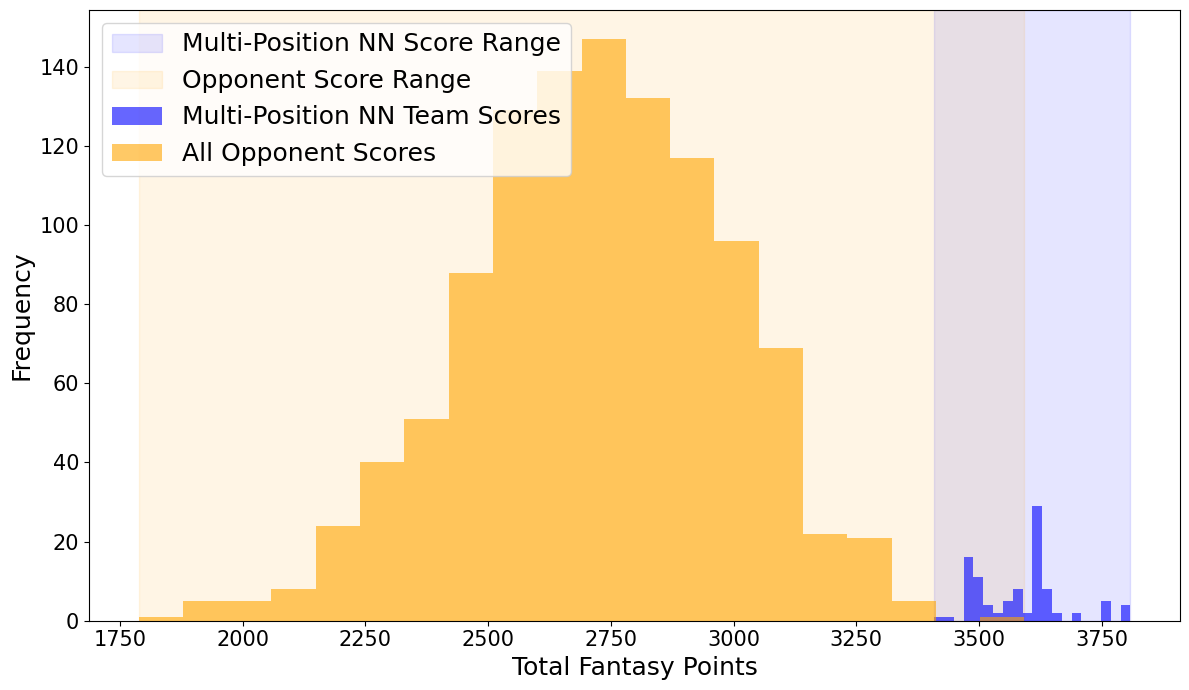

In [23]:
plot_model_vs_all_opponents_histogram(
    nn_universal_results["model_scores"],
    nn_universal_results["all_opponent_scores"],
    model_name="Multi-Position NN"
)

In [24]:
def compute_score_distribution_gap(model_scores, all_opp_scores):
    """
    Computes the gap between the lower bound of the model score distribution 
    and the upper bound of the opponent score distribution.

    Gap = min(model_scores) - max(opponent_scores)

    A positive gap means the two distributions DO NOT overlap.
    A negative gap means they DO overlap.
    """

    # Flatten opponent scores
    flattened_opp_scores = [s for sim in all_opp_scores for s in sim]

    # Compute bounds
    model_low = min(model_scores)
    opp_high = max(flattened_opp_scores)

    # Compute the gap
    gap = model_low - opp_high

    print("Lowest model score:      ", model_low)
    print("Highest opponent score:  ", opp_high)
    print("Score distribution gap:  ", gap)

    return gap

gap_value = compute_score_distribution_gap(nn_universal_results["model_scores"], nn_universal_results["all_opponent_scores"])
print("Final gap:", gap_value)

Lowest model score:       3408.8000000000006
Highest opponent score:   3592.4999999999995
Score distribution gap:   -183.6999999999989
Final gap: -183.6999999999989
